In [1]:
import numpy as np
import pandas as pd

In [22]:
df_gases_2 = pd.read_pickle("./data_gases_2_filtered.pkl")

In [3]:
df_gases_2

,t,C,Um,Ur,Ud,percentage,C_target
0,65,5.984166,0.70175,0.70086,0.77665,0.0,0.0
1,70,-14.744394,0.70181,0.70086,0.77667,0.0,0.0
2,75,-224.305252,0.70211,0.70073,0.77665,0.0,0.0
3,80,-49.504810,0.70185,0.70082,0.77666,0.0,0.0
4,85,-143.622314,0.70192,0.70067,0.77662,0.0,0.0
...,...,...,...,...,...,...,...
2294,11535,-124.971397,0.69357,0.68850,0.77439,0.0,0.0
2295,11540,-223.308426,0.69363,0.68834,0.77440,0.0,0.0
2296,11545,-370.392334,0.69373,0.68813,0.77444,0.0,0.0
2297,11550,-305.286804,0.69384,0.68844,0.77446,0.0,0.0


Рассмотрим величину исходной ошибки датчика на смеси газов, для этого будем использовать метрику MSE. 

In [4]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_gases_2['C'], df_gases_2['C_target'])

264587.3634262082

In [26]:
starting_error = mean_squared_error(df_gases_2['C'], df_gases_2['C_target'])

RMSE

In [5]:
np.sqrt(264587.3634262082)

514.3805628386518

Обратим внимание на ошибку датчика при нулевом значении таргета.

In [16]:
df_zeros = df_gases_2[df_gases_2['percentage'] == 0.0]
df_zeros

,t,C,Um,Ur,Ud,percentage,C_target
0,65,5.984166,0.70175,0.70086,0.77665,0.0,0.0
1,70,-14.744394,0.70181,0.70086,0.77667,0.0,0.0
2,75,-224.305252,0.70211,0.70073,0.77665,0.0,0.0
3,80,-49.504810,0.70185,0.70082,0.77666,0.0,0.0
4,85,-143.622314,0.70192,0.70067,0.77662,0.0,0.0
...,...,...,...,...,...,...,...
2294,11535,-124.971397,0.69357,0.68850,0.77439,0.0,0.0
2295,11540,-223.308426,0.69363,0.68834,0.77440,0.0,0.0
2296,11545,-370.392334,0.69373,0.68813,0.77444,0.0,0.0
2297,11550,-305.286804,0.69384,0.68844,0.77446,0.0,0.0


In [17]:
df_zeros.describe()

,t,C,Um,Ur,Ud,percentage,C_target
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.0,944.0
mean,4124.645127,-110.472104,0.696840,0.693339,0.775264,0.0,0.0
std,3985.195803,119.465875,0.002306,0.003528,0.000607,0.0,0.0
min,65.000000,-418.312286,0.691850,0.686990,0.774200,0.0,0.0
25%,1333.750000,-185.449272,0.696450,0.692847,0.775097,0.0,0.0
50%,2512.500000,-107.936333,0.697590,0.694390,0.775380,0.0,0.0
75%,3691.250000,-33.764821,0.698120,0.695290,0.775660,0.0,0.0
max,11555.000000,233.150726,0.702110,0.700860,0.776670,0.0,0.0


Заметим, что среднее ошибки смещено относительно нуля, а значит если мы сдвинем наши значения С на среднее ошибки при нуле, то MSE должен заметно упасть.

In [23]:
df_gases_2_unbiased = df_gases_2.copy()
df_gases_2_unbiased['C'] = df_gases_2_unbiased['C'] - df_zeros['C'].mean()
df_gases_2_unbiased

,t,C,Um,Ur,Ud,percentage,C_target
0,65,116.456270,0.70175,0.70086,0.77665,0.0,0.0
1,70,95.727710,0.70181,0.70086,0.77667,0.0,0.0
2,75,-113.833148,0.70211,0.70073,0.77665,0.0,0.0
3,80,60.967294,0.70185,0.70082,0.77666,0.0,0.0
4,85,-33.150210,0.70192,0.70067,0.77662,0.0,0.0
...,...,...,...,...,...,...,...
2294,11535,-14.499293,0.69357,0.68850,0.77439,0.0,0.0
2295,11540,-112.836322,0.69363,0.68834,0.77440,0.0,0.0
2296,11545,-259.920230,0.69373,0.68813,0.77444,0.0,0.0
2297,11550,-194.814700,0.69384,0.68844,0.77446,0.0,0.0


In [27]:
error_unbiased = mean_squared_error(df_gases_2_unbiased['C'], df_gases_2['C_target'])

In [28]:
starting_error - error_unbiased

41644.5355350507

In [29]:
np.sqrt(error_unbiased)

472.16821990807205

In [30]:
error_bias = df_zeros['C'].mean()

Как видим ошибка уже значительно улучшилась

Для начала применим простые алгоритмы сглаживания ошибки сигналов, как например метод скользящего среднего

Не будем брать слишком большие окна, чтобы не ухудшить чувствительность сенсора

In [40]:
rolling_means = [df_gases_2_unbiased['C'].rolling(window).mean() for window in range(2,10)]
MSE_rolling = [mean_squared_error(rolling_means[win-2][win:], df_gases_2['C_target'][win:]) for win in range(2,10)]
MSE_rolling

[631510.9422133142,
 1134333.4045558865,
 1667720.4163337927,
 2212155.763586893,
 2760473.6681587785,
 3311069.59220614,
 3864018.0030425023,
 4413961.0121418135]

In [45]:
error_unbiased

222942.8278911575

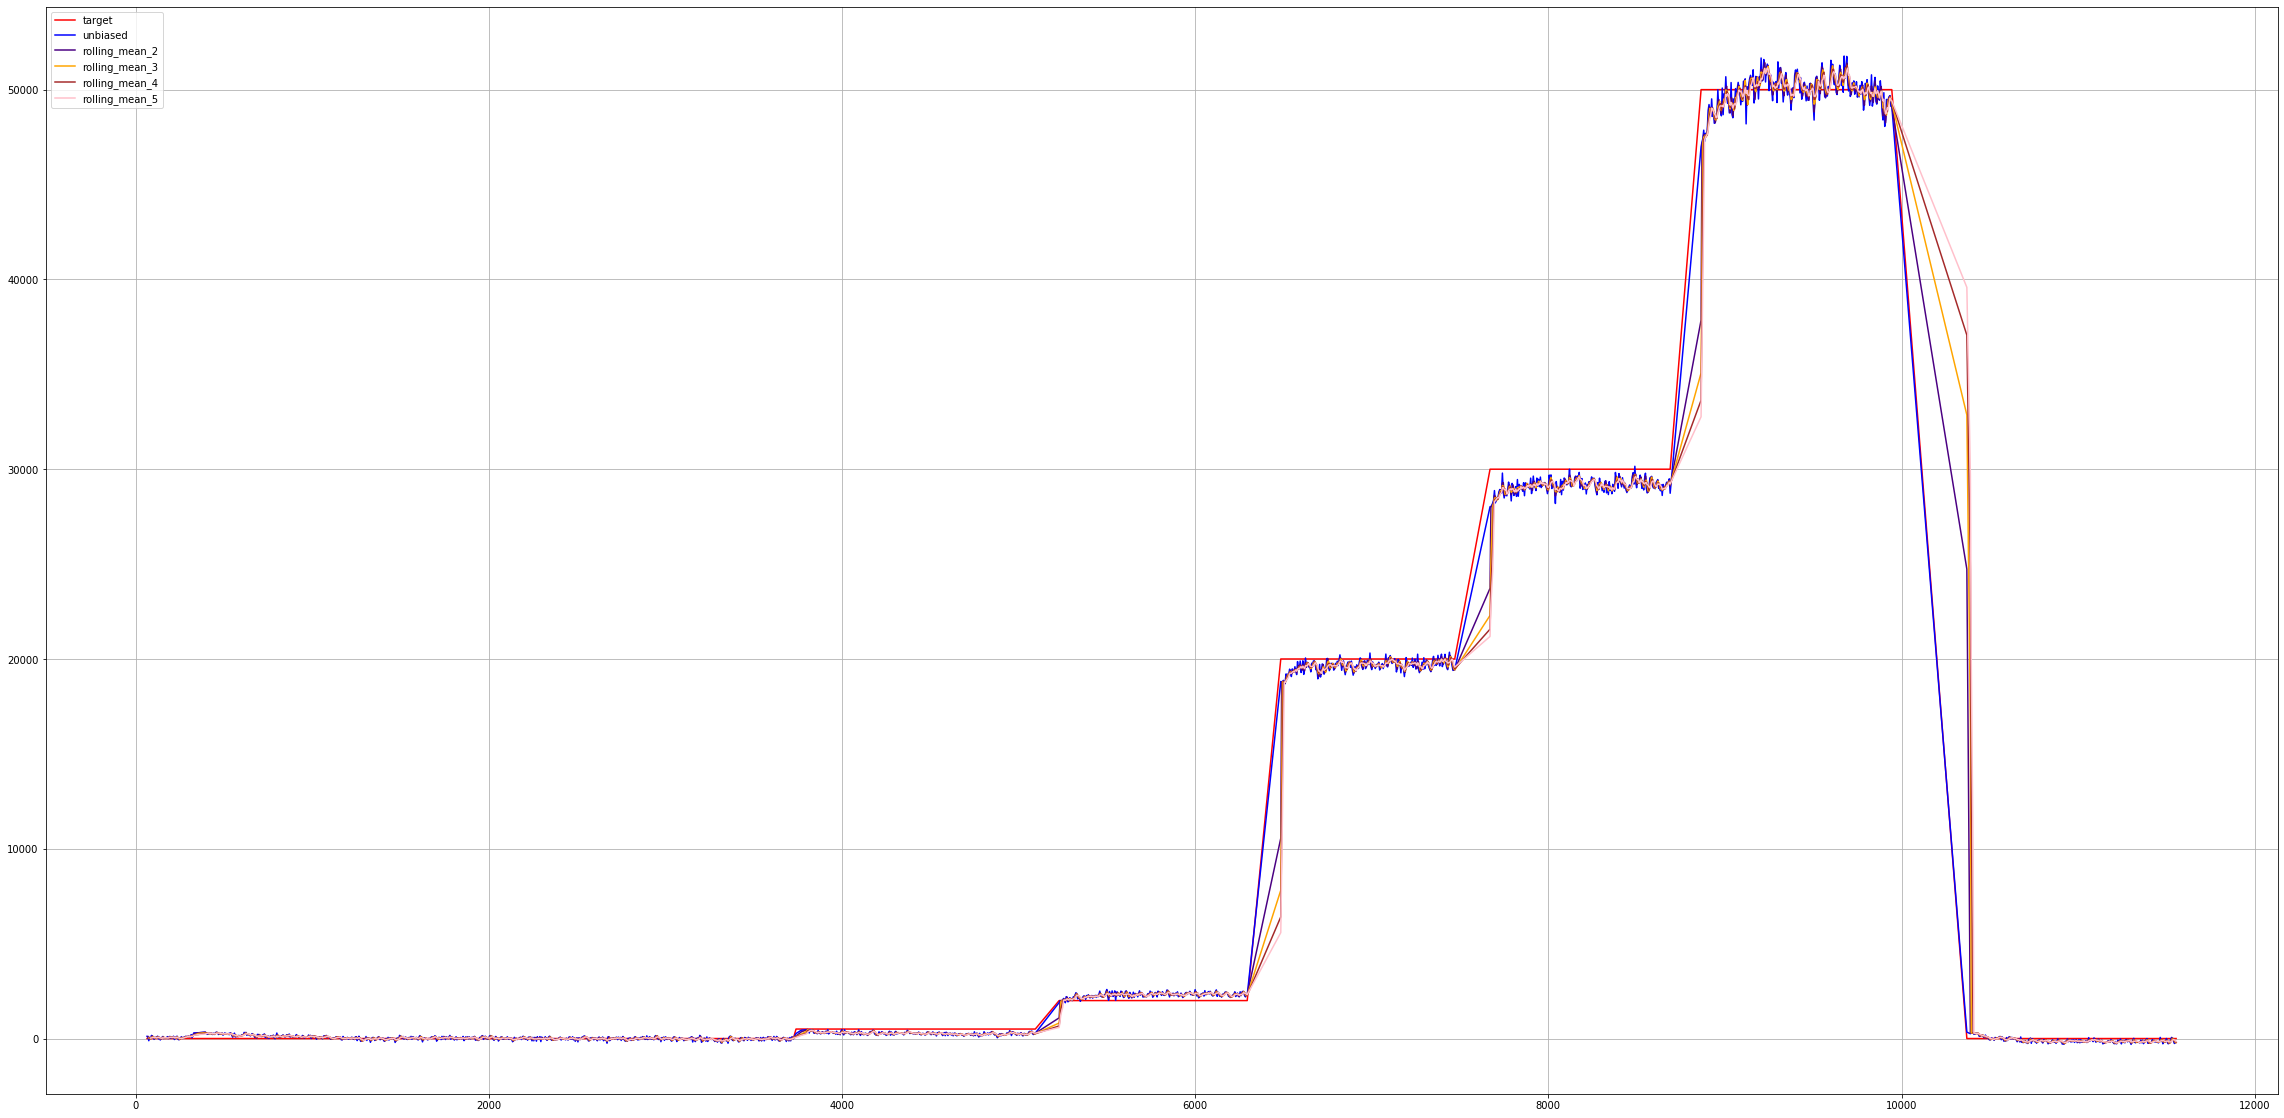

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plt.plot(df_gases_2['t'], df_gases_2['C_target'], label='target', color='red')
plt.plot(df_gases_2['t'], df_gases_2_unbiased['C'], label='unbiased', color='blue')
color_map = ['indigo','orange', 'brown', 'pink']
for win in range(2,6):
    plt.plot(df_gases_2['t'], rolling_means[win-2], label=f'rolling_mean_{win}', color=color_map[win-2])
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [53]:
test_rolling_mean = df_gases_2_unbiased[df_gases_2_unbiased['percentage'] == 2]['C'].rolling(5).mean()
mean_squared_error(test_rolling_mean[4:], df_gases_2[df_gases_2['percentage'] == 2]['C_target'][4:])

168228.38618544588

In [56]:
mean_squared_error(df_gases_2_unbiased[df_gases_2_unbiased['percentage'] == 2]['C'][4:],
                   df_gases_2[df_gases_2['percentage'] == 2]['C_target'][4:])

204409.00980674892

Как видно из результатов MSE, скользящее среднее только ухудшает результат. Причиной подобного, как видно из графика, являются скачки на границах перехода состояний газа (т.к. мы удалили значения дифузии). При непрерывном измерении, скользящее среднее на небольшом окне будет естественно уменьшать значение ошибки, но в ситуации, когда метки целевых значений жёстко детерменированны, в результате чего наблюдения не являются непрерывными, мы не можем гарантировать высокой точности простыми методами сглаживания. В дальнейшем мы будем рассматривать применение более сложных, предсказательных моделей.